#Estimation of Distribution Algorithms (EDAs):
#Bayesian Optimization Algorithm (BOA):
Constructs a probabilistic model of promising solutions and uses it to generate new candidate solutions.

In [ ]:
import numpy as np
from scipy.stats import norm

class BOA:
    def __init__(self, problem_size, population_size, generations):
        """
        Initialize the BOA algorithm with problem parameters.

        Args:
        - problem_size: The dimensionality of the problem space.
        - population_size: The number of candidate solutions in each generation.
        - generations: The number of generations to run the algorithm.
        """
        self.problem_size = problem_size
        self.population_size = population_size
        self.generations = generations

    def initialize_population(self):
        """
        Initialize the population with random candidate solutions.

        Returns:
        - population: A numpy array of shape (population_size, problem_size) representing the initial population.
        """
        return np.random.uniform(low=-5, high=5, size=(self.population_size, self.problem_size))

    def gaussian_model(self, population):
        """
        Construct a Gaussian model from the population.

        Args:
        - population: A numpy array of shape (population_size, problem_size) representing the current population.

        Returns:
        - mean: The mean of each dimension in the population.
        - std_dev: The standard deviation of each dimension in the population.
        """
        mean = np.mean(population, axis=0)
        std_dev = np.std(population, axis=0)
        return mean, std_dev

    def generate_candidate_solution(self, mean, std_dev):
        """
        Generate a new candidate solution using the Gaussian model.

        Args:
        - mean: The mean of each dimension in the Gaussian model.
        - std_dev: The standard deviation of each dimension in the Gaussian model.

        Returns:
        - candidate_solution: A numpy array representing the new candidate solution.
        """
        return np.random.normal(mean, std_dev)

    def run(self):
        """
        Run the BOA algorithm for the specified number of generations.
        """
        population = self.initialize_population()
        for _ in range(self.generations):
            mean, std_dev = self.gaussian_model(population)
            candidate_solution = self.generate_candidate_solution(mean, std_dev)
            # Evaluate candidate_solution and update population
            # For simplicity, let's just print the candidate solution
            print("Candidate solution:", candidate_solution)

# Example usage
problem_size = 10
population_size = 20
generations = 50

boa = BOA(problem_size, population_size, generations)
boa.run()

Candidate solution: [ 1.23392244 -1.92467706 -0.52939577 -0.15951555  0.22761718 -8.12444841
  1.44894769 -0.32327679  0.62066869 -0.03588216]
Candidate solution: [-2.66992008 -0.69532062 -0.83596264  0.38361854 -6.43158401  4.13438651
  0.08813395 -1.13719632  2.86265682 -0.85270377]
Candidate solution: [-0.40957474 -1.60260369 -6.55916895 -3.47238395 -1.58628902 -1.62498739
  1.36015509  2.71520963  0.06798195  2.88171023]
Candidate solution: [-2.62893647 -1.07369173  4.29704709 -4.42130277 -3.02898138 -1.88097267
  1.18762855  3.35935104  5.25734208  6.86633701]
Candidate solution: [ 2.23927323 -3.33173776  2.69470807 -0.47199028  0.50311039  0.31221851
  1.44935586 -4.58427282 -2.43054235 -3.47446147]
Candidate solution: [-2.17334226  0.62958301 -2.37442704  2.95983724 -1.48438548  1.32546029
 -2.08536949 -2.61344514  1.73412785 -2.27217017]
Candidate solution: [-1.89693279  2.48584973 -5.41859955  1.9048481  -3.20802216  0.03450657
 -2.15579297 -2.30053605 -1.2539173   2.28816644]

#Compact Genetic Algorithm (CGA):
Adapts a probabilistic model that captures dependencies between variables to guide the search process efficiently.

In [ ]:
import numpy as np

class CompactGeneticAlgorithm:
    def __init__(self, num_variables, population_size, generations, mutation_rate):
        """
        Initialize the Compact Genetic Algorithm.

        Parameters:
        - num_variables: Number of decision variables.
        - population_size: Number of individuals in the population.
        - generations: Number of generations to run the algorithm.
        - mutation_rate: Probability of mutation for each bit in an individual.
        """
        self.num_variables = num_variables
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.population = None

    def initialize_population(self):
        """
        Initialize the population randomly with binary values.
        """
        self.population = np.random.randint(2, size=(self.population_size, self.num_variables))

    def calculate_fitness(self, individual):
        """
        Calculate the fitness of an individual.

        This function represents the fitness function to be optimized.
        You can replace it with your specific fitness function.

        Parameters:
        - individual: A binary string representing an individual in the population.

        Returns:
        - fitness: The fitness value of the individual.
        """
        return sum(individual)

    def select_parents(self):
        """
        Select parents using tournament selection.
        """
        tournament_size = 2
        parents = []
        for _ in range(2):
            # Randomly select individuals for the tournament
            selected_indices = np.random.choice(range(self.population_size), size=tournament_size, replace=False)
            selected_individuals = [self.population[i] for i in selected_indices]
            selected_fitness = [self.calculate_fitness(individual) for individual in selected_individuals]
            # Choose the winner of the tournament
            winner_index = selected_indices[np.argmax(selected_fitness)]
            parents.append(self.population[winner_index])
        return parents

    def crossover(self, parent1, parent2):
        """
        Perform single-point crossover between two parents.

        Parameters:
        - parent1: Binary string representing the first parent.
        - parent2: Binary string representing the second parent.

        Returns:
        - child1: Binary string representing the first child after crossover.
        - child2: Binary string representing the second child after crossover.
        """
        crossover_point = np.random.randint(1, self.num_variables)
        child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
        return child1, child2

    def mutate(self, individual):
        """
        Mutate an individual with a certain probability.

        Parameters:
        - individual: Binary string representing an individual.

        Returns:
        - mutated_individual: Binary string representing the mutated individual.
        """
        for i in range(len(individual)):
            if np.random.rand() < self.mutation_rate:
                individual[i] = 1 - individual[i]  # Flip the bit
        return individual

    def run(self):
        """
        Run the Compact Genetic Algorithm.

        Returns:
        - best_individual: Binary string representing the best solution found.
        - best_fitness: Fitness value of the best solution.
        """
        self.initialize_population()
        for _ in range(self.generations):
            new_population = []
            for _ in range(self.population_size // 2):
                parent1, parent2 = self.select_parents()
                child1, child2 = self.crossover(parent1, parent2)
                child1 = self.mutate(child1)
                child2 = self.mutate(child2)
                new_population.extend([child1, child2])
            self.population = np.array(new_population)
        best_individual = max(self.population, key=self.calculate_fitness)
        return best_individual, self.calculate_fitness(best_individual)

# Example usage:
num_variables = 10
population_size = 100
generations = 50
mutation_rate = 0.1

cga = CompactGeneticAlgorithm(num_variables, population_size, generations, mutation_rate)
best_solution, best_fitness = cga.run()
print("Best solution:", best_solution)
print("Best fitness:", best_fitness)

Best solution: [1 0 1 1 1 1 1 1 1 1]
Best fitness: 9


#3. Factorized Distribution Algorithm (FDA):
Represents the population distribution as a factorized model to efficiently capture and utilize interactions among variables.

Generation 1: Best Fitness = 10
Generation 2: Best Fitness = 10
Generation 3: Best Fitness = 10
Generation 4: Best Fitness = 10
Generation 5: Best Fitness = 10
Generation 6: Best Fitness = 10
Generation 7: Best Fitness = 10
Generation 8: Best Fitness = 10
Generation 9: Best Fitness = 10
Generation 10: Best Fitness = 10
Generation 11: Best Fitness = 10
Generation 12: Best Fitness = 10
Generation 13: Best Fitness = 10
Generation 14: Best Fitness = 10
Generation 15: Best Fitness = 10
Generation 16: Best Fitness = 10
Generation 17: Best Fitness = 10
Generation 18: Best Fitness = 10
Generation 19: Best Fitness = 10
Generation 20: Best Fitness = 10
Generation 21: Best Fitness = 10
Generation 22: Best Fitness = 10
Generation 23: Best Fitness = 10
Generation 24: Best Fitness = 10
Generation 25: Best Fitness = 10
Generation 26: Best Fitness = 10
Generation 27: Best Fitness = 10
Generation 28: Best Fitness = 10
Generation 29: Best Fitness = 10
Generation 30: Best Fitness = 10
Generation 31: Best

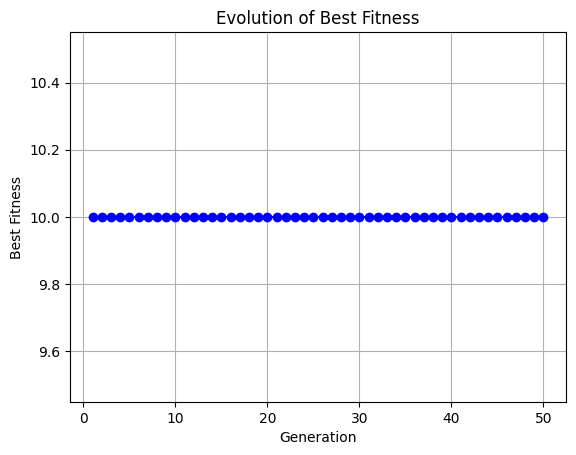

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class FactorizedDistributionAlgorithm:
    def __init__(self, num_variables, population_size, generations, mutation_rate):
        self.num_variables = num_variables
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.population = None
        self.best_solution_history = []  # To store the best solution over generations
        self.best_fitness_history = []   # To store the fitness of the best solution over generations

    def initialize_population(self):
        self.population = np.random.randint(2, size=(self.population_size, self.num_variables))

    def calculate_fitness(self, individual):
        return sum(individual)

    def select_parents(self):
        tournament_size = 2
        parents = []
        for _ in range(2):
            selected_indices = np.random.choice(range(self.population_size), size=tournament_size, replace=False)
            selected_individuals = [self.population[i] for i in selected_indices]
            selected_fitness = [self.calculate_fitness(individual) for individual in selected_individuals]
            winner_index = selected_indices[np.argmax(selected_fitness)]
            parents.append(self.population[winner_index])
        return parents

    def crossover(self, parent1, parent2):
        crossover_point = np.random.randint(1, self.num_variables)
        child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
        return child1, child2

    def mutate(self, individual):
        for i in range(len(individual)):
            if np.random.rand() < self.mutation_rate:
                individual[i] = 1 - individual[i]
        return individual

    def run(self):
        self.initialize_population()
        for generation in range(self.generations):
            new_population = []
            for _ in range(self.population_size // 2):
                parent1, parent2 = self.select_parents()
                child1, child2 = self.crossover(parent1, parent2)
                child1 = self.mutate(child1)
                child2 = self.mutate(child2)
                new_population.extend([child1, child2])
            self.population = np.array(new_population)
            best_individual = max(self.population, key=self.calculate_fitness)
            best_fitness = self.calculate_fitness(best_individual)
            self.best_solution_history.append(best_individual)
            self.best_fitness_history.append(best_fitness)
            print(f"Generation {generation+1}: Best Fitness = {best_fitness}")
        best_individual = max(self.population, key=self.calculate_fitness)
        best_fitness = self.calculate_fitness(best_individual)
        print("Algorithm Finished.")
        return best_individual, best_fitness

    def plot_evolution(self):
        generations = range(1, self.generations + 1)
        plt.plot(generations, self.best_fitness_history, marker='o', color='b')
        plt.title('Evolution of Best Fitness')
        plt.xlabel('Generation')
        plt.ylabel('Best Fitness')
        plt.grid(True)
        plt.show()

# Example usage:
num_variables = 10
population_size = 100
generations = 50
mutation_rate = 0.1

fda = FactorizedDistributionAlgorithm(num_variables, population_size, generations, mutation_rate)
best_solution, best_fitness = fda.run()
print("Best solution:", best_solution)
print("Best fitness:", best_fitness)
fda.plot_evolution()

#4. Univariate Marginal Distribution Algorithm (UMDA):
Utilizes univariate marginal distributions to model the probability distribution of solutions.


Generation 1: Best Fitness = 9
Generation 2: Best Fitness = 10
Generation 3: Best Fitness = 10
Generation 4: Best Fitness = 10
Generation 5: Best Fitness = 10
Generation 6: Best Fitness = 10
Generation 7: Best Fitness = 10
Generation 8: Best Fitness = 10
Generation 9: Best Fitness = 10
Generation 10: Best Fitness = 10
Generation 11: Best Fitness = 10
Generation 12: Best Fitness = 10
Generation 13: Best Fitness = 10
Generation 14: Best Fitness = 10
Generation 15: Best Fitness = 10
Generation 16: Best Fitness = 10
Generation 17: Best Fitness = 10
Generation 18: Best Fitness = 10
Generation 19: Best Fitness = 10
Generation 20: Best Fitness = 10
Generation 21: Best Fitness = 10
Generation 22: Best Fitness = 10
Generation 23: Best Fitness = 10
Generation 24: Best Fitness = 10
Generation 25: Best Fitness = 10
Generation 26: Best Fitness = 10
Generation 27: Best Fitness = 10
Generation 28: Best Fitness = 10
Generation 29: Best Fitness = 10
Generation 30: Best Fitness = 10
Generation 31: Best 

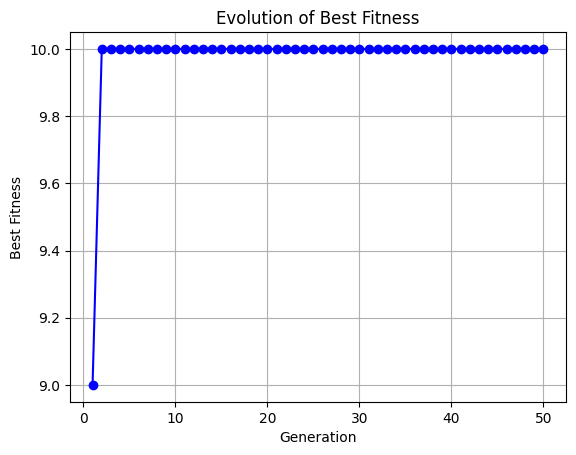

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class UnivariateMarginalDistributionAlgorithm:
    def __init__(self, num_variables, population_size, generations, mutation_rate):
        self.num_variables = num_variables
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.population = None
        self.best_solution_history = []  # To store the best solution over generations
        self.best_fitness_history = []   # To store the fitness of the best solution over generations

    def initialize_population(self):
        self.population = np.random.randint(2, size=(self.population_size, self.num_variables))

    def calculate_fitness(self, individual):
        return sum(individual)

    def select_parents(self):
        tournament_size = 2
        parents = []
        for _ in range(2):
            selected_indices = np.random.choice(range(self.population_size), size=tournament_size, replace=False)
            selected_individuals = [self.population[i] for i in selected_indices]
            selected_fitness = [self.calculate_fitness(individual) for individual in selected_individuals]
            winner_index = selected_indices[np.argmax(selected_fitness)]
            parents.append(self.population[winner_index])
        return parents

    def crossover(self, parent1, parent2):
        crossover_point = np.random.randint(1, self.num_variables)
        child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
        return child1, child2

    def mutate(self, individual):
        for i in range(len(individual)):
            if np.random.rand() < self.mutation_rate:
                individual[i] = 1 - individual[i]
        return individual

    def run(self):
        self.initialize_population()
        for generation in range(self.generations):
            new_population = []
            for _ in range(self.population_size // 2):
                parent1, parent2 = self.select_parents()
                child1, child2 = self.crossover(parent1, parent2)
                child1 = self.mutate(child1)
                child2 = self.mutate(child2)
                new_population.extend([child1, child2])
            self.population = np.array(new_population)
            best_individual = max(self.population, key=self.calculate_fitness)
            best_fitness = self.calculate_fitness(best_individual)
            self.best_solution_history.append(best_individual)
            self.best_fitness_history.append(best_fitness)
            print(f"Generation {generation+1}: Best Fitness = {best_fitness}")
        best_individual = max(self.population, key=self.calculate_fitness)
        best_fitness = self.calculate_fitness(best_individual)
        print("Algorithm Finished.")
        return best_individual, best_fitness

    def plot_evolution(self):
        generations = range(1, self.generations + 1)
        plt.plot(generations, self.best_fitness_history, marker='o', color='b')
        plt.title('Evolution of Best Fitness')
        plt.xlabel('Generation')
        plt.ylabel('Best Fitness')
        plt.grid(True)
        plt.show()

# Example usage:
num_variables = 10
population_size = 100
generations = 50
mutation_rate = 0.1

umda = UnivariateMarginalDistributionAlgorithm(num_variables, population_size, generations, mutation_rate)
best_solution, best_fitness = umda.run()
print("Best solution:", best_solution)
print("Best fitness:", best_fitness)
umda.plot_evolution()

#5. Bayesian Optimization with Gaussian Processes (BOGP):
Integrates Gaussian processes with Bayesian optimization to model and optimize complex functions efficiently.

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessin

Optimized parameters: [4.96147993 4.45396625]
Optimized value: -1.2246929021267792


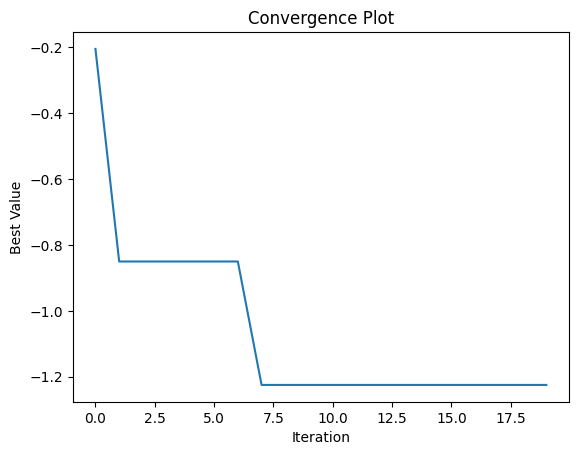

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import matplotlib.pyplot as plt

class BayesianOptimization:
    def __init__(self, objective_function, bounds):
        self.objective_function = objective_function
        self.bounds = bounds
        self.X = []
        self.y = []

    def acquisition_function(self, x, X_sample, y_sample, gp, xi=0.01):
        mu, sigma = gp.predict(x.reshape(1, -1), return_std=True)

        # Calculate acquisition function value
        acquisition_value = mu - xi * sigma
        return -acquisition_value

    def optimize(self, n_iter=10):
        best_values = []
        for _ in range(n_iter):
            # Fit GP to observed data
            kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
            gp = GaussianProcessRegressor(kernel=kernel)

            if len(self.X) > 0:  # Check if there is any observation
                gp.fit(np.array(self.X), np.array(self.y))

                # Optimize acquisition function to find next point to sample
                opt_result = minimize(self.acquisition_function, x0=np.random.uniform(self.bounds[:, 0], self.bounds[:, 1]), args=(np.array(self.X), np.array(self.y), gp), bounds=self.bounds)
                next_x = opt_result.x
            else:  # If no observation, choose a random point within the bounds
                next_x = np.random.uniform(self.bounds[:, 0], self.bounds[:, 1])

            # Evaluate objective function at the new point
            next_y = self.objective_function(next_x)

            # Update data
            self.X.append(next_x)
            self.y.append(next_y)
            best_values.append(min(self.y))

        # Return the best observed value after optimization
        best_idx = np.argmin(self.y)
        return self.X[best_idx], self.y[best_idx], best_values

# Example usage
def objective_function(x):
    return np.sin(x[0]) + np.cos(x[1])

bounds = np.array([[-5.0, 5.0], [-5.0, 5.0]])
bayes_opt = BayesianOptimization(objective_function, bounds)
best_params, best_value, best_values = bayes_opt.optimize(n_iter=20)

print("Optimized parameters:", best_params)
print("Optimized value:", best_value)

# Plot convergence
plt.plot(best_values)
plt.xlabel('Iteration')
plt.ylabel('Best Value')
plt.title('Convergence Plot')
plt.show()